### Import-Libraries

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os, sys
from random import randint
from math import exp, pi
from sklearn.model_selection import KFold
eps = np.finfo(float).eps

#### Data reading and preprocessing

In [120]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))
    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)
    
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df, test_df

In [121]:
def dataNormalization(train, test, target):
    testFeatures = test.drop([target], axis = 1)
    trainFeatures = train.drop([target], axis = 1)

    trainStd = trainFeatures.std()
    trainMean = trainFeatures.mean()
    
    '''
    Normalising Train Data & Test Data
    '''
    trainFeatures = (trainFeatures - trainMean) / trainStd
    testFeatures = (testFeatures - trainMean) / trainStd
    
    return trainFeatures, testFeatures

In [122]:
if __name__ == "__main__":
    '''
    Reading data and Seperating features and label (X,Y)
    '''
    df = pd.read_csv("../input_data/AdmissionDataset/data.csv")
    df = df.drop(['Serial No.'], axis = 1)
    target = 'Chance of Admit '
    
    '''
    Splitting Data into training and test set
    '''
    train, test = train_test_split(df, test_size = 0.2)
    trainData, testData = dataNormalization(train, test, target)
    trainData = np.concatenate((np.ones([trainData.shape[0], 1]), trainData),axis=1)

#### Gradient Descent

In [123]:
def sign(val):
    if val >= 0:
        return 1;
    else: 
        return -1;

In [124]:
def gradient_descent_L1(x, y, lembda):
    '''
    Initialising the coeficients with 0's
    '''
    m_curr = [0 for i in range(8)]
    learning_rate, n, iterations = 0.1, len(x), 500
    for i in range(0, iterations, 1):
        '''
        Predicting the training data so to compute cost
        '''
        y_predicted = 0
        for i in range(8):
            y_predicted += m_curr[i] * x[:,i]
        
        '''
        Gradient of Loss Function With L1 Factor
        '''
        md = [None for i in range(8)]
        md[0] = (1/n)*sum(x[:,0]*(y_predicted-y))
        for i in range(1, 8, 1):
            md[i] = (1/n)*sum(x[:,i]*(y_predicted-y))+ (1/n)*lembda*sign(m_curr[i])
                
        '''
        Changing Coefficients
        '''    
        for i in range(8):
            m_curr[i] = m_curr[i] - learning_rate * md[i]
        
    '''
    Predicting the training data at the end so as to compute final training data error
    '''
    for i in range(8):
        y_predicted += m_curr[i] * x[:,i]
    err = y-y_predicted
    error = (1/(2*n)) * sum([val**2 for val in (err)])
    
    '''
    Returning Model i.e., coeficients with training data error
    '''
    return m_curr, error

In [125]:
def gradient_descent_L2(x,y,lembda):
    '''
    Initialising the coeficients with 0's
    '''
    m_curr = [0 for i in range(8)]
    learning_rate, n, iterations = 0.1, len(x), 500
    for i in range(0, iterations, 1):
        '''
        Predicting the training data so to compute cost
        '''
        y_predicted = 0
        for i in range(8):
            y_predicted += m_curr[i] * x[:,i]
        
        '''
        Gradient of Loss Function With L1 Factor
        '''
        md = [None for i in range(8)]
        md[0] = (1/n)*sum(x[:,0]*(y_predicted-y))
        for i in range(1, 8, 1):
            md[i] = (1/n)*sum(x[:,i]*(y_predicted-y))+ (1/n)*lembda * m_curr[i]
                
        '''
        Changing Coefficients
        '''    
        for i in range(8):
            m_curr[i] = m_curr[i] - learning_rate * md[i]
        
    '''
    Predicting the training data at the end so as to compute final training data error
    '''
    for i in range(8):
        y_predicted += m_curr[i] * x[:,i]
    err = y-y_predicted
    error = (1/(2*n)) * sum([val**2 for val in (err)])
    
    '''
    Returning Model i.e., coeficients with training data error
    '''
    return m_curr, error

#### Prediction Function 

#### Predict Function takes data and predicts on every example and stores into result

In [126]:
def predict(model, testData):
    '''
    Converting dataframe to np array
    '''
    result = []
    for i in range(len(testData)):
        pred = predict_one(model,testData.iloc[[i]])
        result.append(pred)
    return result

#### Takes a single example and return prediction

In [127]:
def predict_one(model,testRow):
    normalised = model[0]
    for i in range(1, 8, 1):
        val = model[i] * testRow.values[0][i-1]
        normalised += val
    return normalised

###  L1 Regularization

In [128]:
e, l, e_t = [], [i for i in range(45)], []
for i in range(45):
    model, e_ = gradient_descent_L1(trainData, train[target], i)
    e_t.append(e_)
    n, result = len(testData), predict(model, testData)
    total = sum([val**2 for val in (test[target] - result)]
    e.append((1/(2*n)) * total)
                
'''
l = lambda values
e = test error --> different lambda
e_t = train error wrt different lambda
'''

#### Plotting Graph

##### Lambda VS Training Error

In [145]:
def plotGraph(xdata, ydata, color):
    plt.plot(xdata, ydata, color)
    plt.xlabel("lambda λ")
    plt.ylabel("Error")
    plt.show()

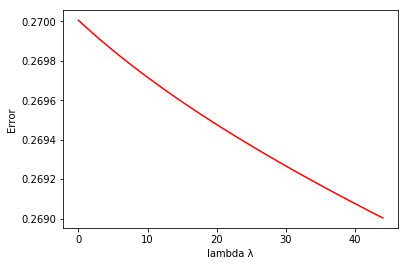

In [146]:
'''
Plotting graph beween lambda values and Training Error
'''
plotGraph(l, e_t, 'r')

##### Lambda VS Testing Error

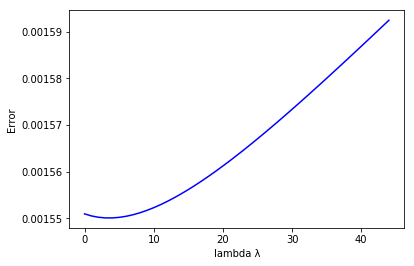

In [147]:
'''
Plotting graph beween lambda values and Test Error
'''
plotGraph(l, e, 'b')

##### Training and Testing Error in One GRAPH

Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.


if lambda is zero then we will get back same model i.e., without Regularization whereas very large value will make coefficients zero hence it will under-fit.

### L2 Regularizatoin

In [131]:
l, e, e_t = [i for i in range(45)], [], []
for i in range(45):
    model, e_ = gradient_descent_L2(trainData, train[target], i)
    e_t.append(e_)
    n, result = len(testData), predict(model,testData)
    total = sum([val**2 for val in (test[target] - result)])
    e.append((1/(2*n)) * total)

'''
l = lambda values
e = test error --> different lambda
e_t = train error wrt different lambda
'''

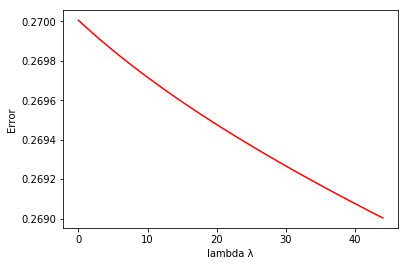

In [148]:
'''
Plotting graph beween lambda λ values and Training Error
'''
plotGraph(l, e_t, 'r')

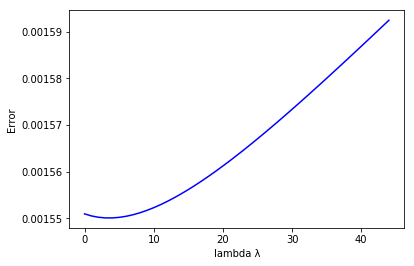

In [149]:
'''
Plotting graph beween lambda values and Training Error
'''
plotGraph(l, e, 'b')

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.

### 3. Hyper-parameter λ plays a role in deciding between bias and variance
Increasing λ decreases the complexness of the model, hence the bias will increase, and also the take a look at accuracy will increase. however when a precise purpose, each errros increase because the weights become negligible

### 4. Regularisation techniques affecting regression weight

In [134]:
''' 
Taking Lambda  = 13 As in Graph Error is lesser
'''
Weights2,_ = gradient_descent_L2(trainData, train[target],i)
Weights1,_ = gradient_descent_L1(trainData, train[target],i)
print("For L1 Regularization\n",Weights1,"\n\nFor L2 Regularization\n",Weights2)

For L1 Regularization
 [0.7216388888888885, 0.00846766751751938, 0.010983230670059092, 0.0017244538861330505, -0.0011218812704397053, 0.01212033783243131, 0.0004209685292772833, 0.005272126991399244] 

For L2 Regularization
 [0.7216388888888884, 0.02502281404928044, 0.019241547855442766, 0.008076276493231577, 0.007099938558059715, 0.016076334769657162, 0.049891084183431335, 0.015579398681420956]


As it can be clearly seen the weights for L1 and approaching more towards 0 and hence reducing the effect of features more adversly as compared to L2 where the weights are more than weights from L1

### 5(a)  k-fold cross validation.

In [137]:
def dataNormalization1(dataFeatures, target):
    '''
    Storing the mean and standard deviation of training data so as to apply on test data
    '''
    dataMean = dataFeatures.mean()
    dataStd = dataFeatures.std()
    
    '''
    Normalising Train Data
    '''
    dataFeatures = (dataFeatures - dataMean) / dataStd
    
    '''
    Normalising Test Data
    '''
    return dataFeatures

In [138]:
Features = df.drop([target], axis = 1)
data = dataNormalization1(Features, target)
Y_full, errors = df[target].values, []
X_full = np.concatenate((np.ones([data.shape[0],1]), data), axis = 1)

'''
Storing Average for k = 2 to 50 number of folds
'''
for folds in range(2, 50):
    kfold, error = KFold(n_splits = folds), 0
    for tr_i, ts_i in kfold.split(X_full):
        Y_train,Y_test = Y_full[tr_i],Y_full[ts_i]
        X_train,X_test = X_full[tr_i],X_full[ts_i]
        model,_ = gradient_descent_L2(X_train,Y_train,0)
        n, result = len(X_test), predict(model,pd.DataFrame(X_test))
        total = sum([val**2 for val in (Y_test-result)])
        error += (1/(n)) * total
    temp = error/folds
    errors.append(temp)

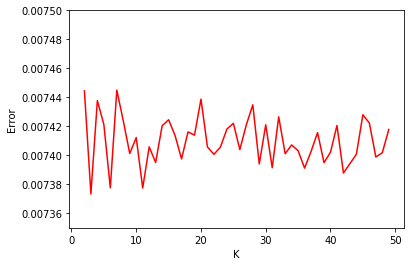

In [142]:
plt.xlabel("K")
plt.ylabel("Error")
k = [i  for i in range(2,50)]
plt.plot(k, errors, 'r')
val =[0.00735,0.00750]
plt.gca().set_ylim(val)
plt.show()

### 5(b)  Leave One out cross validation.

In [101]:
Features = df.drop([target], axis = 1)
data = dataNormalization(Features, target)
X_full = np.concatenate((np.ones([data.shape[0],1]), data), axis = 1)
Y_full, errors = df[target].values, []

kfold = KFold(n_splits=len(X_full))
error = 0
for tr_i, ts_i in kfold.split(X_full):
    Y_train, Y_test = Y_full[tr_i],Y_full[ts_i]
    X_train, X_test = X_full[tr_i],X_full[ts_i]
    model,_ = gradient_descent_L2(X_train,Y_train,0)
    n, result = len(X_test), predict(model, pd.DataFrame(X_test))
    total = sum([val**2 for val in (Y_test-result)])
    error += (1/(2*n)) * total
print("Average Error ")
print(error/len(X_full))

Average Error 
0.0037082061903709385


Leave One out cross validation is K-fold cross validation taken to its logical extreme, with K equal to N, the number of data points in the set. That means that N separate times, the function approximator is trained on all the data except for one point and a prediction is made for that point. 